In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
coursera = pd.read_csv("data/Coursera.csv")
udemy = pd.read_csv("data/Udemy.csv")
skillshare = pd.read_csv("data/skillshare.csv")
edx = pd.read_csv("data/edx.csv")

In [3]:
coursera.sample()

,partner,course,skills,rating,reviewcount,level,certificatetype,duration,crediteligibility
1008,"University of Maryland, College Park",Fundamentals of Technology Sales,"{"" Communication"","" Problem Solving"","" Sales"",...",4.6,69,Beginner,Course,1 - 3 Months,False


In [4]:
udemy.sample()

,title,description,instructor,rating,reviewcount,duration,lectures,level
24762,The Art & Science of Drawing / FORM & SPACE,Learn to draw in 3-Dimensions,Brent Eviston,4.9,2927,3 total hours,11 lectures,All Levels


In [5]:
skillshare.sample()

,title,link,duration,instructor,students
788,"Smart Responsive UX Design: Clever Tips, Trick...",https://www.skillshare.com/en/classes/Smart-Re...,1h 28m,Vitaly Friedman,"9,990 students"


In [6]:
edx.sample()

,title,link,institution,subject,level,prerequisites,language,videotranscript,associatedprograms,associatedskills
117,Improving Your BusinessThrough a Culture ofHealth,https://www.edx.org/learn/healthcare/harvard-u...,Harvard University,Business & Management,Introductory,NaN,English,English,NaN,Employee Retention


## Coursera

In [7]:
coursera.sample(5)

,partner,course,skills,rating,reviewcount,level,certificatetype,duration,crediteligibility
379,Stanford University,Probabilistic Graphical Models,"{"" Bayesian Network"","" Probability & Statistic...",4.6,1.5k,Advanced,Specialization,3 - 6 Months,False
799,University of Michigan,Python Classes and Inheritance,"{"" Computer Programming"","" Python Programming""}",4.7,3.5k,Intermediate,Course,1 - 4 Weeks,False
855,IBM,Generative AI: Introduction and Applications,"{""(14 reviews)""}",4.6,14,Beginner,Course,1 - 4 Weeks,False
733,Knowledge Accelerators,From Excel to Power BI,"{"" Data Analysis"","" Data Model"","" Microsoft Ex...",4.4,149,Beginner,Course,1 - 4 Weeks,False
19,DeepLearning.AI,Deep Learning,"{"" Machine Learning"","" Deep Learning"","" Artifi...",4.8,141.5k,Intermediate,Specialization,3 - 6 Months,True


In [8]:
coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   partner            1139 non-null   object 
 1   course             1139 non-null   object 
 2   skills             1088 non-null   object 
 3   rating             993 non-null    float64
 4   reviewcount        993 non-null    object 
 5   level              1004 non-null   object 
 6   certificatetype    1116 non-null   object 
 7   duration           1116 non-null   object 
 8   crediteligibility  1139 non-null   bool   
dtypes: bool(1), float64(1), object(7)
memory usage: 72.4+ KB


In [9]:
coursera['reviewcount'] = pd.to_numeric(coursera['reviewcount'].str.replace('k', 'e3').str.replace('B', 'e9'), errors='coerce')

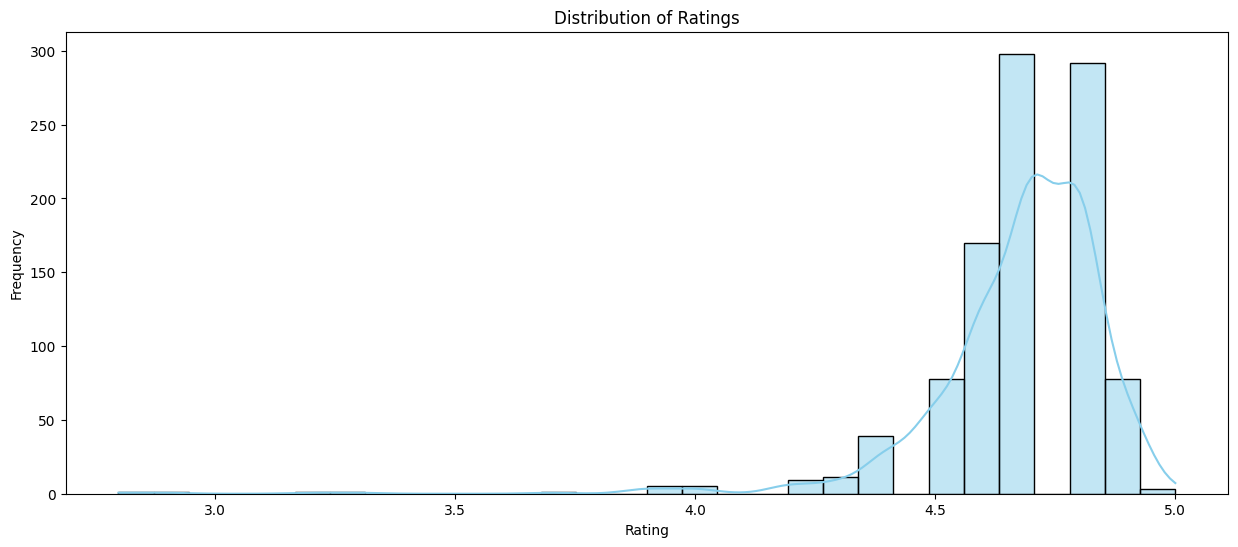

In [10]:
# Distribution of Ratings
plt.figure(figsize=(15, 6))
sns.histplot(coursera['rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_22568/1635232983.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='level', data=coursera, order=coursera['level'].value_counts().index, palette='viridis')


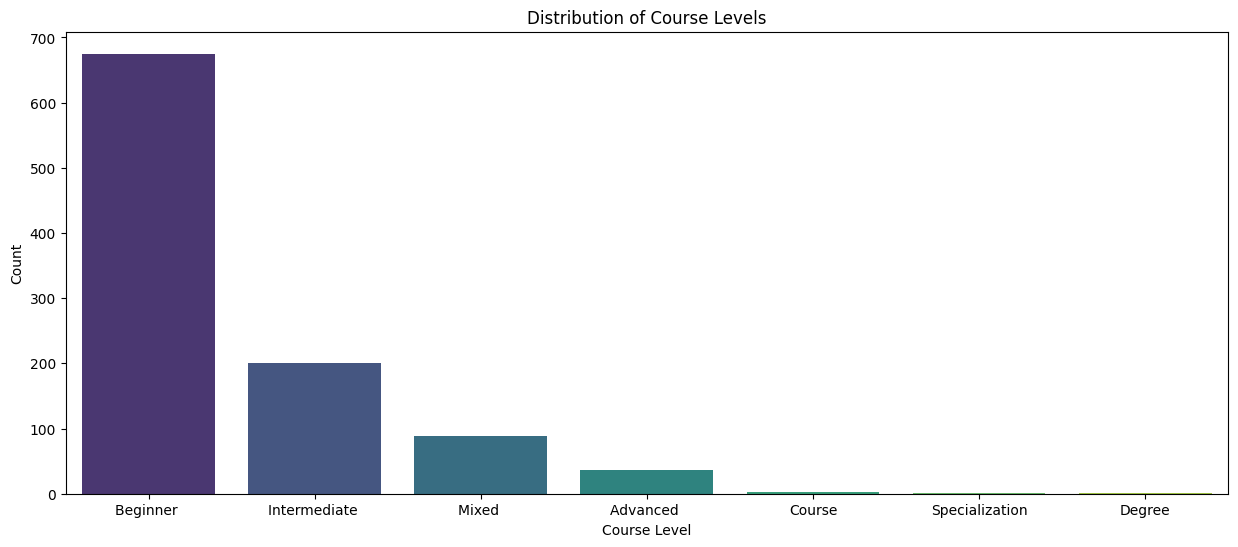

In [11]:
# Course Levels
plt.figure(figsize=(15, 6))
sns.countplot(x='level', data=coursera, order=coursera['level'].value_counts().index, palette='viridis')
plt.title('Distribution of Course Levels')
plt.xlabel('Course Level')
plt.ylabel('Count')
plt.show()

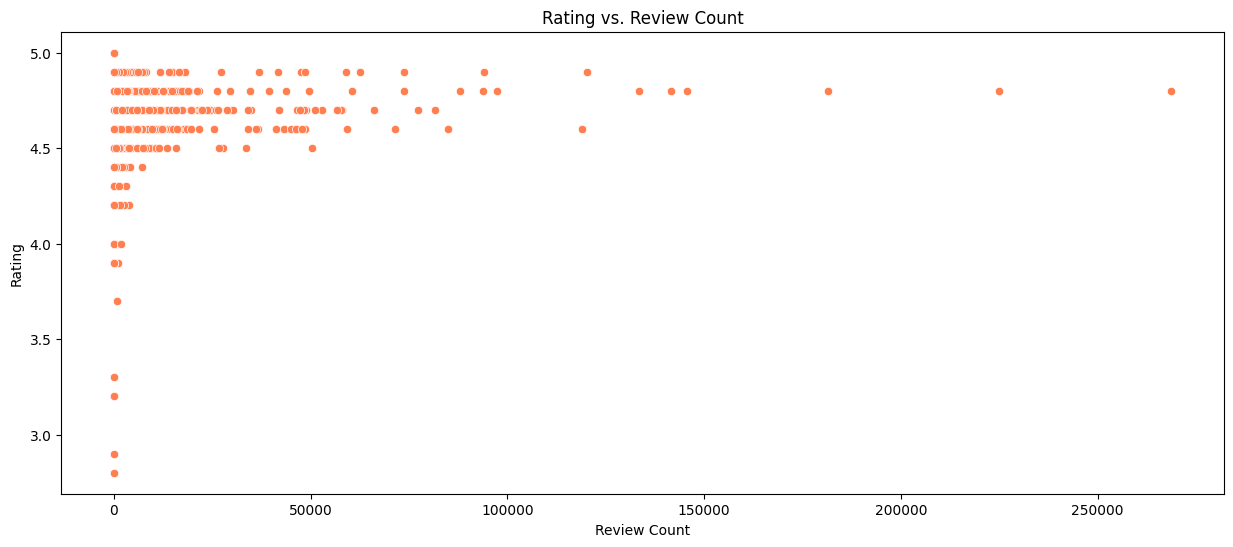

In [12]:
# Relationship Between Rating and Review Count
plt.figure(figsize=(15, 6))
sns.scatterplot(x='reviewcount', y='rating', data=coursera, color='coral')
plt.title('Rating vs. Review Count')
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.show()

/tmp/ipykernel_22568/972006000.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='rating', y='partner', data=top_partner_data, palette='muted', ci=None)
/tmp/ipykernel_22568/972006000.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='partner', data=top_partner_data, palette='muted', ci=None)


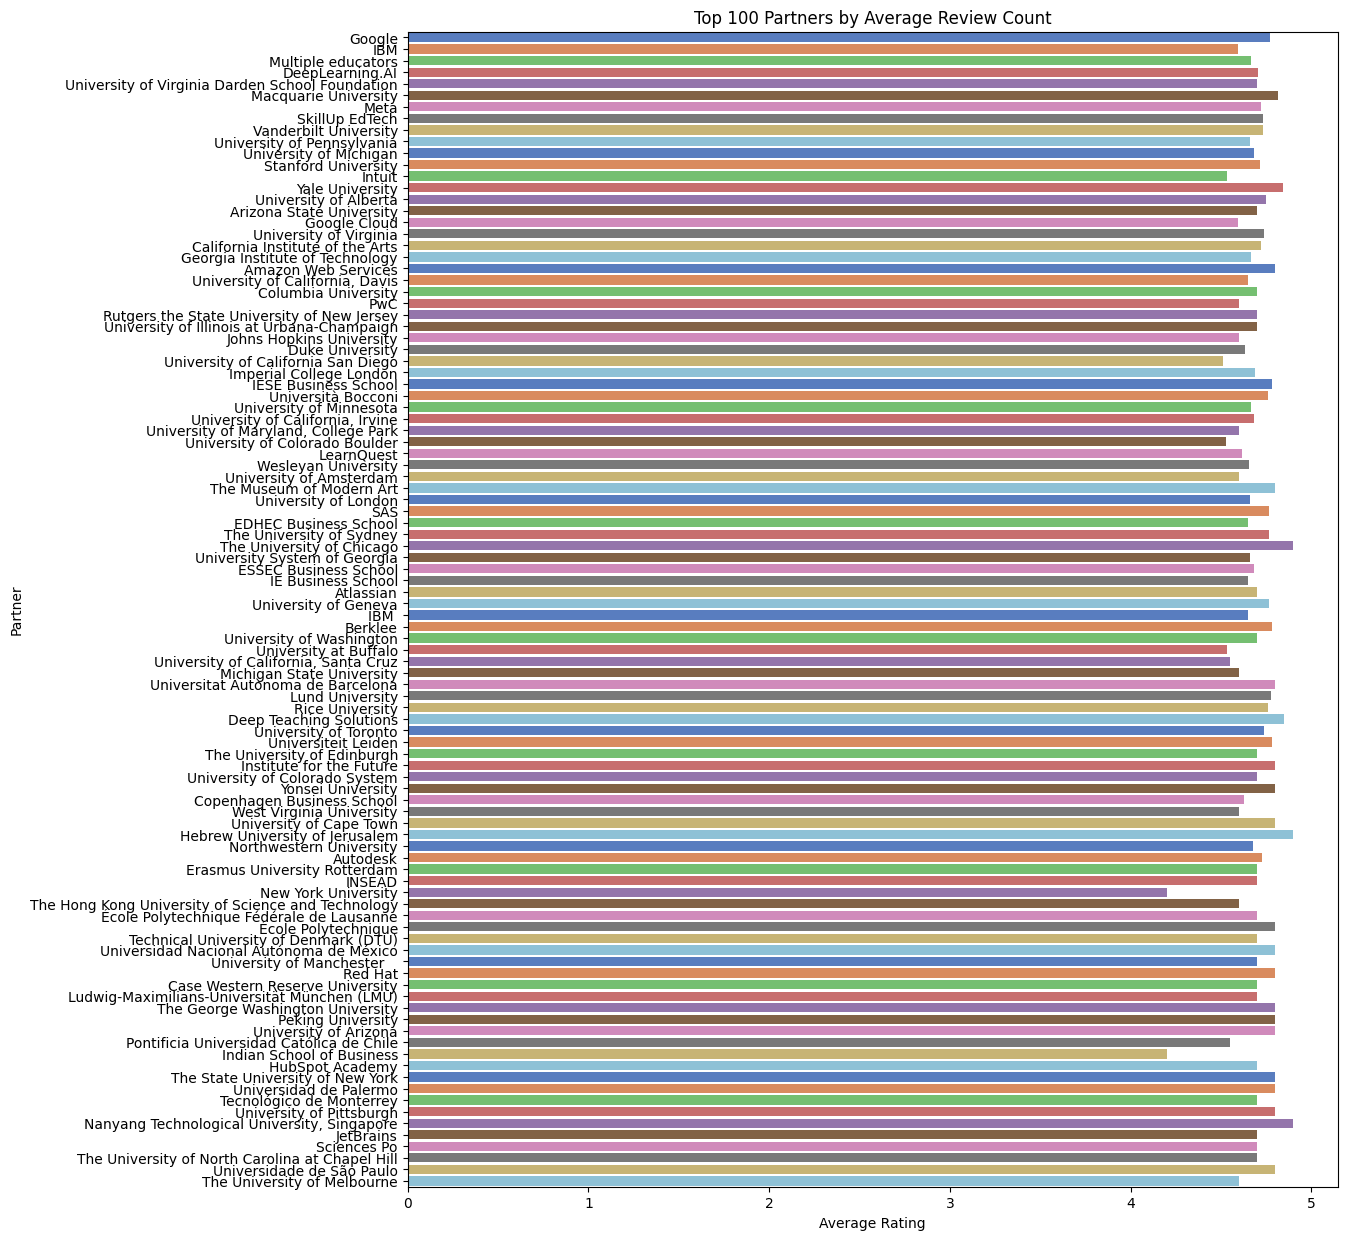

In [13]:
# Show only the top N partners with the highest average ratings
top_n = 100
top_partners = coursera.groupby('partner')['reviewcount'].mean().sort_values(ascending=False).head(top_n).index

# Filter the DataFrame to include only the top partners
top_partner_data = coursera[coursera['partner'].isin(top_partners)]

# Partner Performance - Horizontal Bar Plot
plt.figure(figsize=(12, 15))
sns.barplot(x='rating', y='partner', data=top_partner_data, palette='muted', ci=None)
plt.title(f'Top {top_n} Partners by Average Review Count')
plt.xlabel('Average Rating')
plt.ylabel('Partner')
plt.show()

/tmp/ipykernel_22568/486161814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='certificatetype', data=coursera, order=coursera['certificatetype'].value_counts().index, palette='pastel')


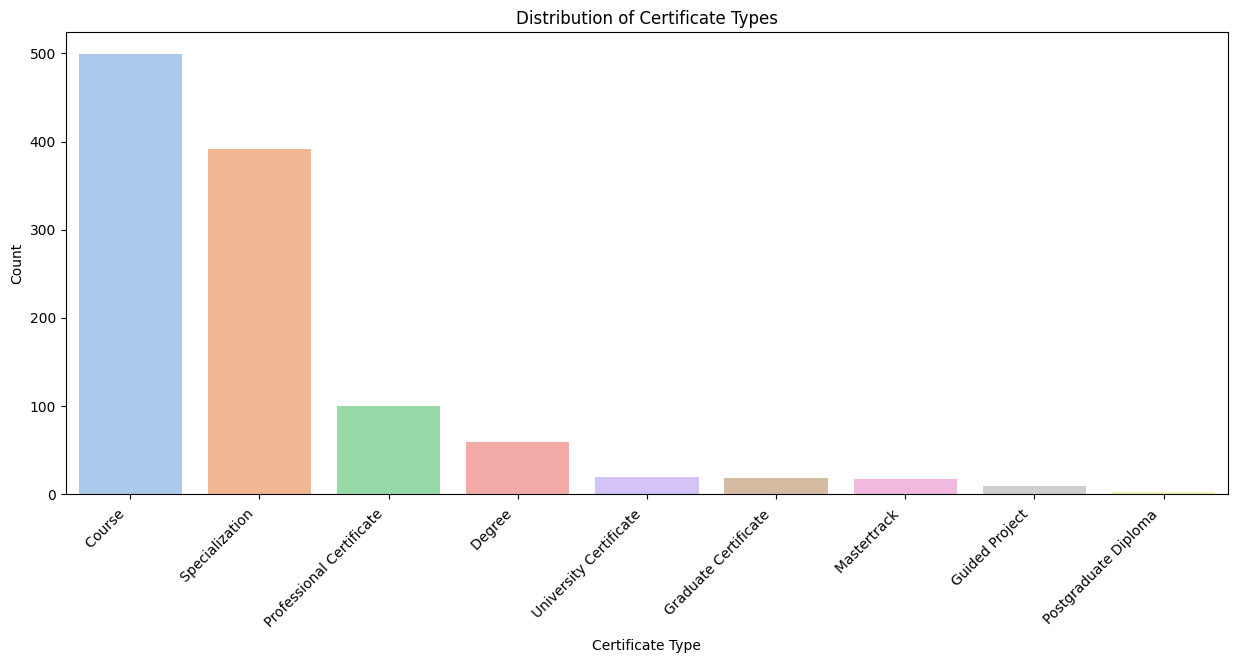

In [14]:
# Certificate Types
plt.figure(figsize=(15, 6))
sns.countplot(x='certificatetype', data=coursera, order=coursera['certificatetype'].value_counts().index, palette='pastel')
plt.title('Distribution of Certificate Types')
plt.xlabel('Certificate Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

/tmp/ipykernel_22568/636125751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='duration', y='rating', data=coursera, palette='Set3')


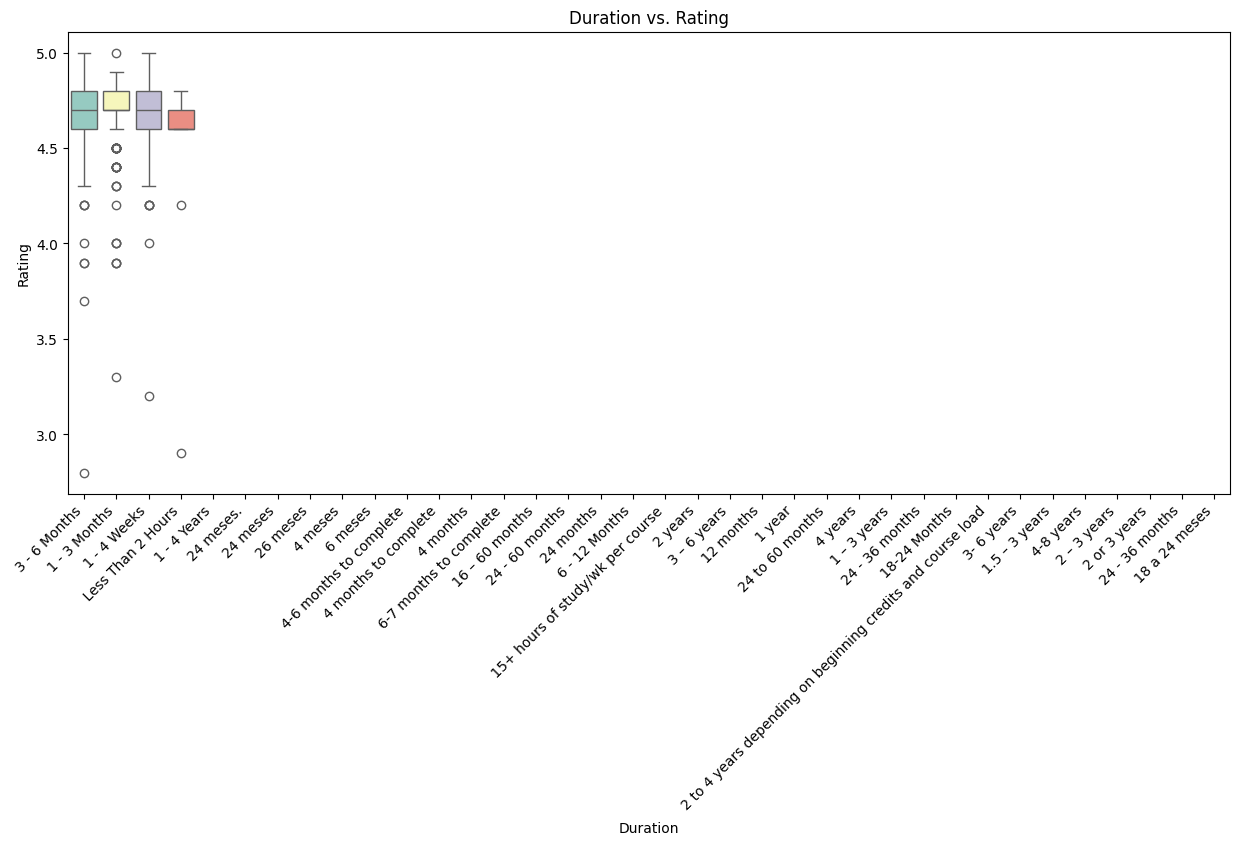

In [15]:
# Duration Analysis
plt.figure(figsize=(15, 6))
sns.boxplot(x='duration', y='rating', data=coursera, palette='Set3')
plt.title('Duration vs. Rating')
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

/tmp/ipykernel_22568/608208249.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Skill', data=skills_counts.head(top_n_skills), palette='viridis')


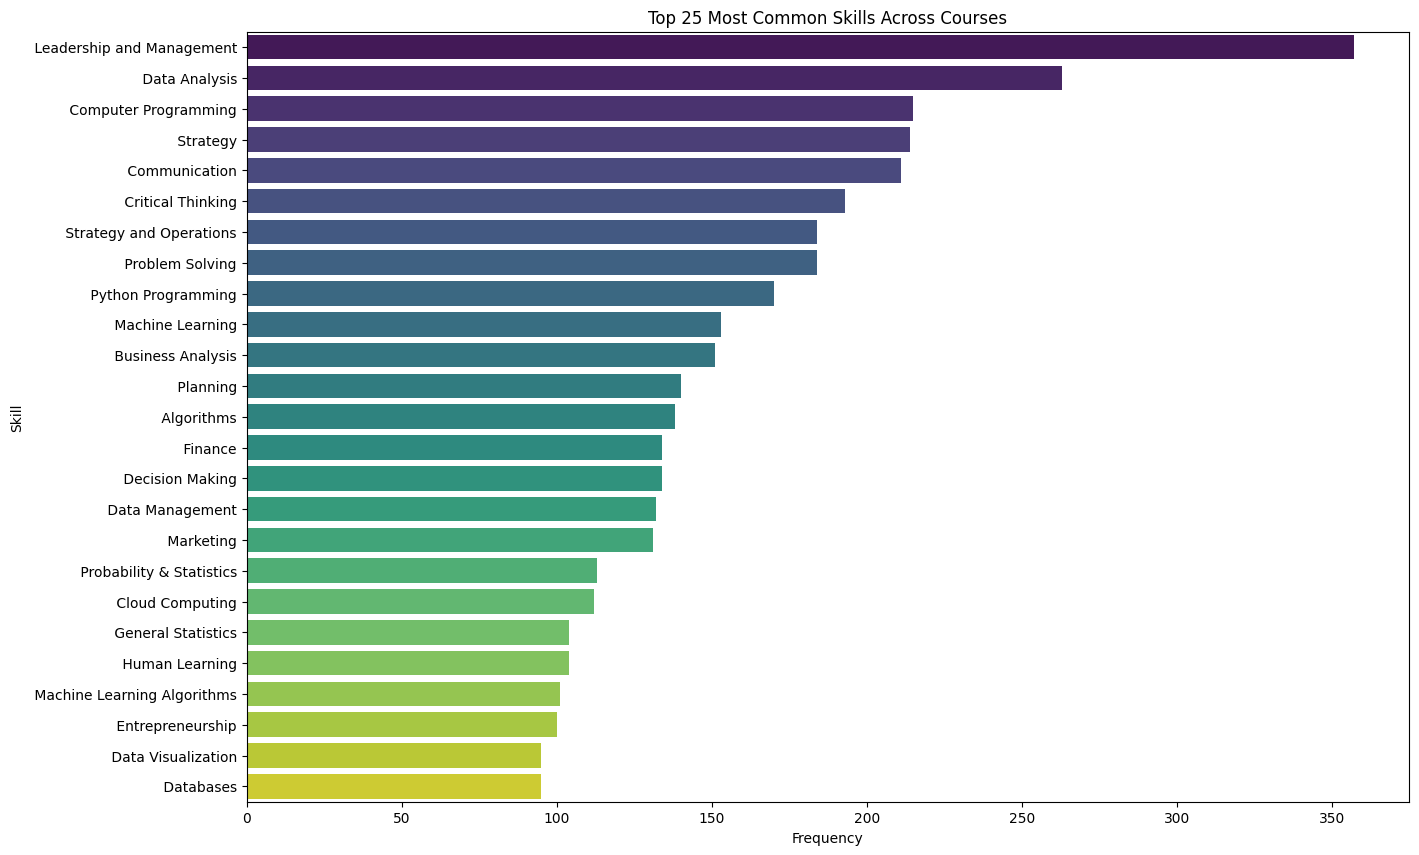

In [16]:
# Assuming your data is stored in a DataFrame named 'coursera'
# Load your data if you haven't already
# coursera = pd.read_csv('your_dataset.csv')

# Check for missing values in the 'skills' column
coursera['skills'] = coursera['skills'].apply(lambda x: [skill.strip('"{}') for skill in str(x).split('","')] if pd.notnull(x) else [])

# Flatten the list of skills
all_skills = [skill for skills_list in coursera['skills'] for skill in skills_list]

# Create a DataFrame for skills and their frequencies
skills_df = pd.DataFrame(all_skills, columns=['Skill'])
skills_counts = skills_df['Skill'].value_counts().reset_index()
skills_counts.columns = ['Skill', 'Frequency']

# Plot the top N skills
top_n_skills = 25
plt.figure(figsize=(15, 10))
sns.barplot(x='Frequency', y='Skill', data=skills_counts.head(top_n_skills), palette='viridis')
plt.title(f'Top {top_n_skills} Most Common Skills Across Courses')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.show()

In [17]:
skills_counts

,Skill,Frequency
0,Leadership and Management,357
1,Data Analysis,263
2,Computer Programming,215
3,Strategy,214
4,Communication,211
...,...,...
427,(70 reviews),1
428,(4.5k reviews),1
429,(461 reviews),1
430,(7.1k reviews),1


In [18]:
coursera["reviewcount"].mean()

7827.922457200403

# Coursera Courses Exploratory Data Analysis Report

## Overview

The dataset provides information about various online courses offered on Coursera, including details about the partner organization, course content, ratings, duration, and more.

### Summary Statistics

- Total Courses: 1139
- Average Rating: 4.6
- Average Review Count: 7827

### Ratings Distribution

- The majority of courses have high ratings, with an average rating of 4.6.
- The distribution is slightly positively skewed, indicating a generally positive sentiment among learners.

### Course Levels

- Most courses are categorized as "Beginner," reflecting the accessibility of the platform to learners of various expertise levels.

### Relationship Between Rating and Review Count

- There is a positive correlation between the number of reviews and the rating.
- Courses with higher ratings tend to attract more reviews.

### Partner Performance
- Google, IBM, and DeepLearning.AI are among the top-rated partners.

### Certificate Types

- Most courses offer "Specialization Certificates," indicating a focus on providing valuable, career-oriented certifications.

### Duration Analysis
- The median rating for courses with a duration of 3 - 6 months is higher compared to other durations.

### Skills Analysis
- Skills such as "Leadership and Management", "Data Analysis" and "Computer Programming" are prevalent.

---

## Conclusion

The exploratory data analysis provides valuable insights into the distribution, relationships, and characteristics of Coursera courses. Courses on the platform generally receive positive ratings, and there is a correlation between high ratings and the number of reviews. The analysis also highlights the top-performing partners, the prevalence of "Specialization Certificates," and the impact of course duration on ratings.

The information gained from this analysis can inform decision-making processes for learners, educators, and platform administrators. Further analysis and targeted investigations could explore specific patterns in skills, partnerships, or other dimensions.

---


# Udemy

In [19]:
udemy['duration_hours'] = pd.to_numeric(udemy['duration'].str.replace(' total hours', ''), errors='coerce')

# Handle missing values in 'level' column
udemy['level'] = udemy['level'].fillna('Not Specified')

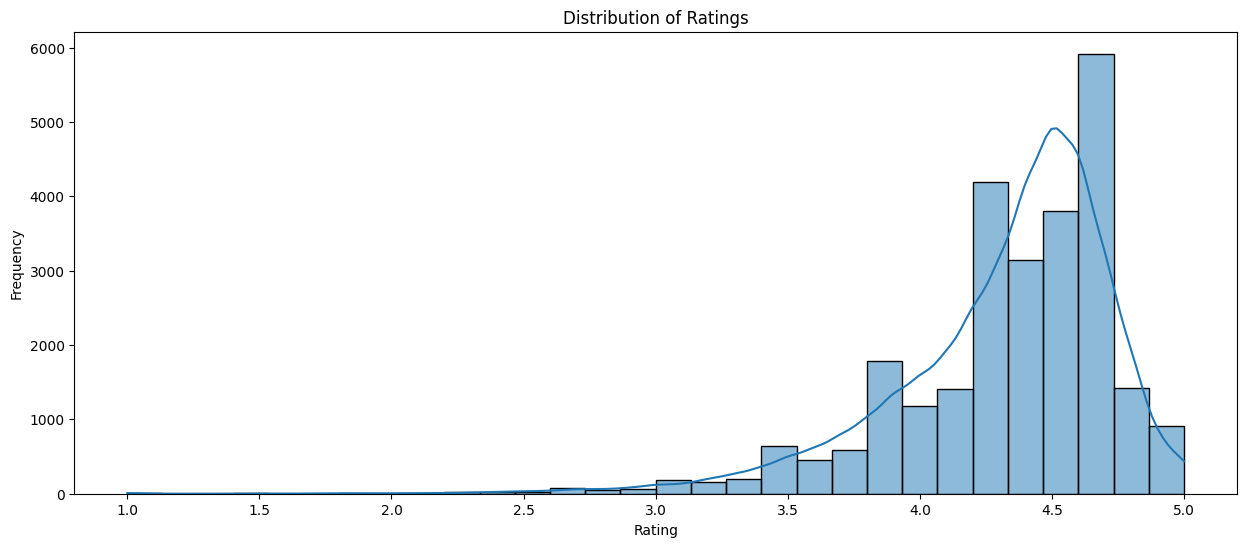

In [20]:
# Distribution of Ratings
plt.figure(figsize=(15, 6))
sns.histplot(udemy['rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

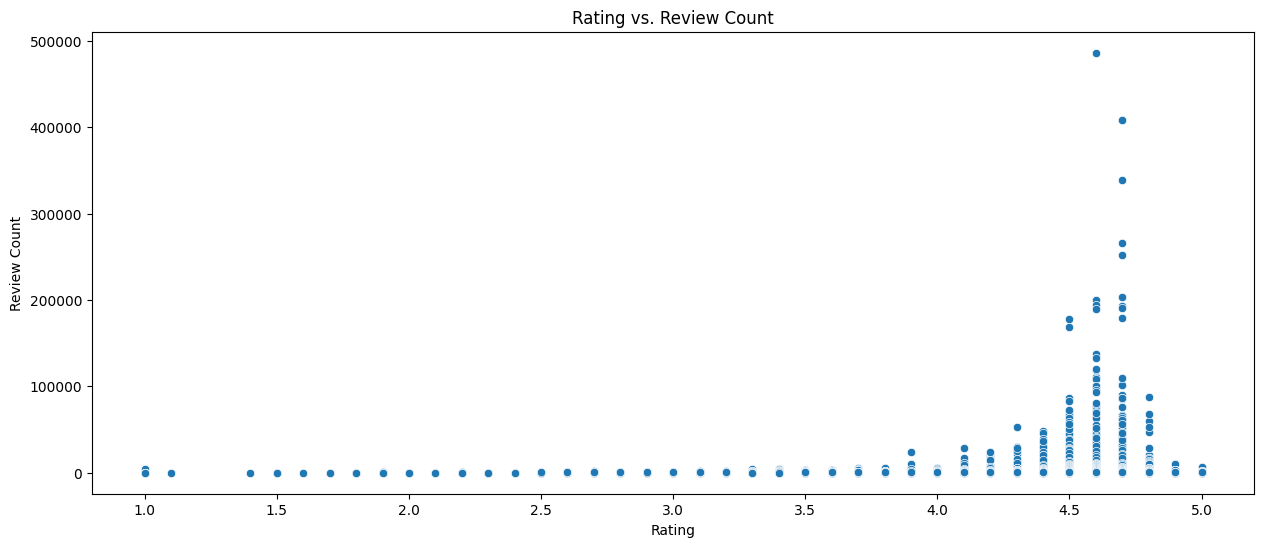

In [21]:
# Relationship between Rating and Review Count
plt.figure(figsize=(15, 6))
sns.scatterplot(x='rating', y='reviewcount', data=udemy)
plt.title('Rating vs. Review Count')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.show()

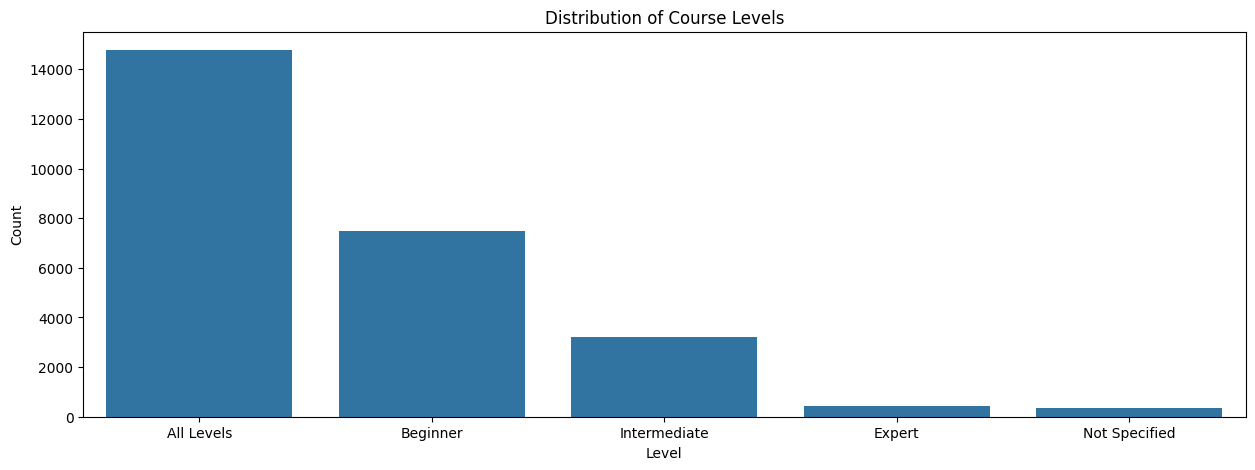

In [22]:
# Distribution of Course Levels
plt.figure(figsize=(15, 5))
sns.countplot(x='level', data=udemy, order=udemy['level'].value_counts().index)
plt.title('Distribution of Course Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

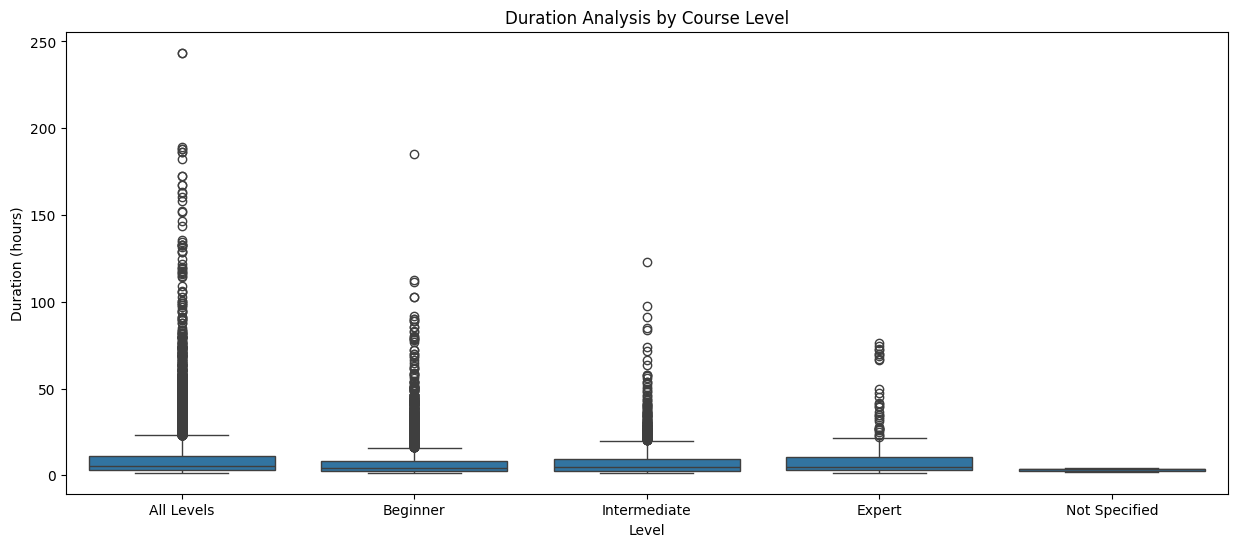

In [23]:
# Duration Analysis
plt.figure(figsize=(15, 6))
sns.boxplot(x='level', y='duration_hours', data=udemy)
plt.title('Duration Analysis by Course Level')
plt.xlabel('Level')
plt.ylabel('Duration (hours)')
plt.show()

/tmp/ipykernel_22568/2783727589.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_instructors.index, y=top_instructors.values, palette='viridis')


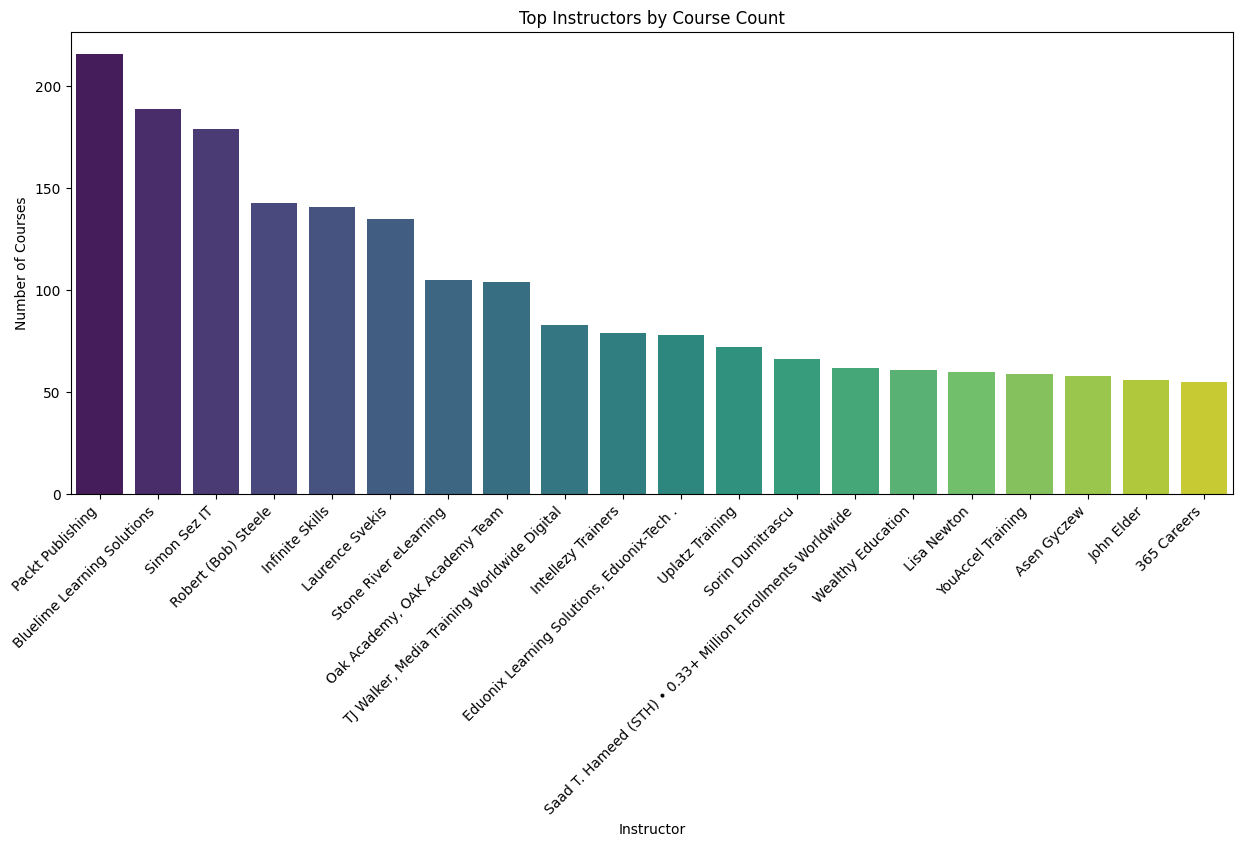

In [24]:
# Top Instructors by Course Count
top_instructors = udemy['instructor'].value_counts().head(20)

# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(x=top_instructors.index, y=top_instructors.values, palette='viridis')
plt.title('Top Instructors by Course Count')
plt.xlabel('Instructor')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45, ha='right')
plt.show()

In [25]:
udemy["reviewcount"].mean()

1549.3408744667886

# Udemy Courses Exploratory Data Analysis Report

## Overview

The dataset contains information about various Udemy courses, including details like title, description, instructor, rating, review count, duration, lectures, and level.

### Summary Statistics

- Total Courses: 26256
- Average Rating: 4.3
- Average Review Count: 1549

### Ratings Distribution

- The distribution of ratings across courses shows a peak around 4.6, indicating a generally positive sentiment among learners.

### Relationship Between Rating and Review Count
- There is a positive correlation between the number of reviews and the rating.
- Courses with higher ratings tend to attract more reviews.

### Course Levels

- The majority of courses are categorized as "All Levels," showcasing the platform's inclusivity for learners of various expertise levels.

### Duration Analysis

- The boxplot illustrates the distribution of course durations across different levels.
- "Expert" courses tend to have a shorter duration, while "All Levels" courses exhibit more variation.

### Top Instructors by Course Count

- The bar chart displays the top instructors based on the number of courses they have on Udemy.
- "Packt Publishing" leads with the highest number of courses.

### EDA on Lectures

### Distribution of Lecture Counts

- The boxplot illustrates the distribution of lecture counts across all courses.
- The median number of lectures is 50, with some courses having a higher or lower number of lectures.

---

### Conclusion

The exploratory data analysis provides initial insights into the Udemy courses dataset. Courses on the platform generally receive positive ratings, with a positive correlation between ratings and the number of reviews. The inclusivity of courses for all levels is evident, and there is variation in course durations across different levels.

These findings can inform decisions for learners, instructors, and Udemy administrators. Further analysis could explore specific content categories, instructor performance, or trends over time.

---


# SkillShare

In [26]:
# Data Cleaning

# Extract numeric part from 'students' and convert to numeric
skillshare['students'] = skillshare['students'].str.extract('(\d+)').astype(float)

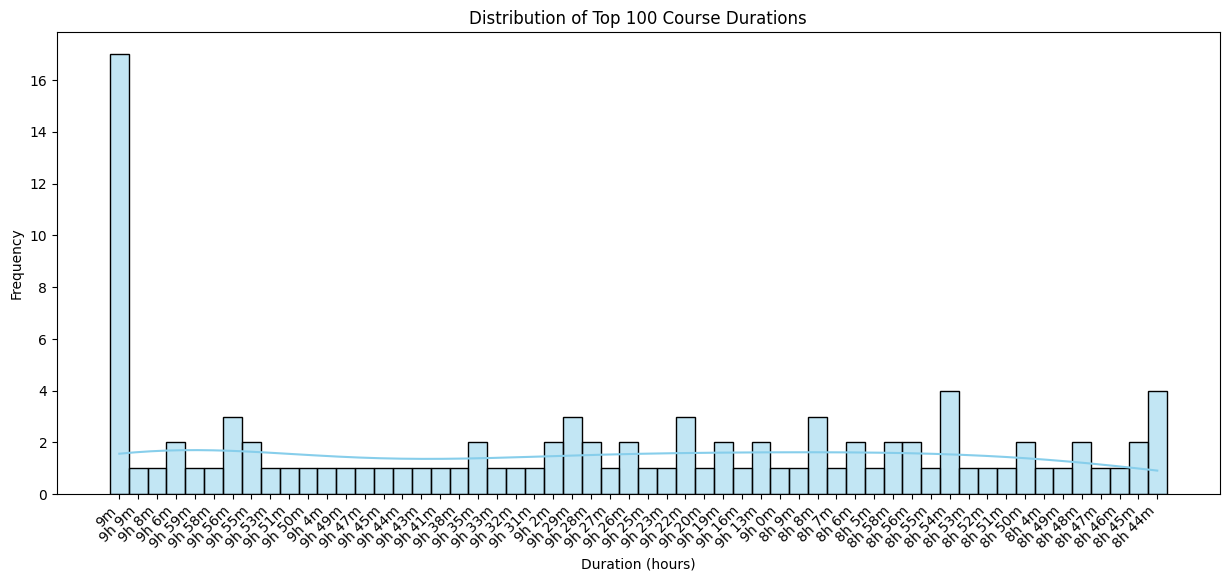

In [27]:
# Sort the DataFrame by duration in descending order
top_duration_courses = skillshare.sort_values(by='duration', ascending=False).head(100)

# EDA on Top 100 Duration
plt.figure(figsize=(15, 6))
sns.histplot(top_duration_courses['duration'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Top 100 Course Durations')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


/tmp/ipykernel_22568/1023828969.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='students', y='title', data=top_students_courses, palette='muted')


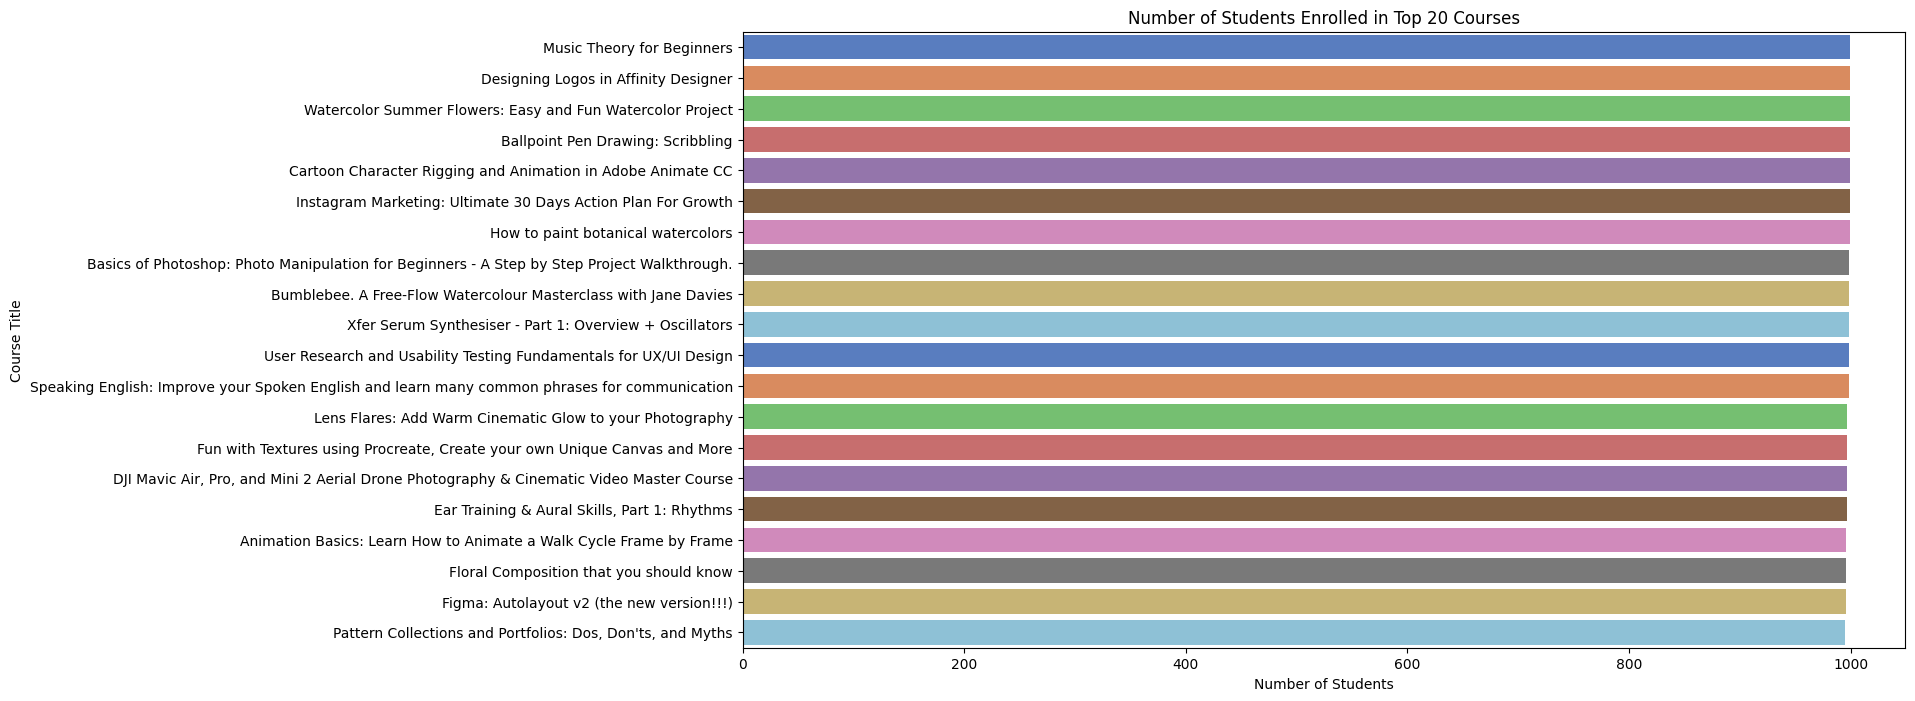

In [28]:
# Sort the DataFrame by the number of students enrolled in descending order
top_students_courses = skillshare.sort_values(by='students', ascending=False).head(20)

# Bar plot for Number of Students Enrolled in top 20 courses
plt.figure(figsize=(15, 8))
sns.barplot(x='students', y='title', data=top_students_courses, palette='muted')
plt.title('Number of Students Enrolled in Top 20 Courses')
plt.xlabel('Number of Students')
plt.ylabel('Course Title')
plt.show()

# Skillshare Courses Analysis Report

### Overview

This report analyzes datasets from Skillshare, Udemy, and Coursera to gain insights into various aspects of online courses, including partners, certificates, instructors, and course durations. The analysis covers a wide range of topics such as course popularity, average ratings, and enrollment numbers.


### Duration Distribution

The distribution of course durations in Skillshare was visualized to understand the overall pattern. However, due to the large number of courses, the initial histogram appeared cluttered. To address this, a focused analysis was performed on the top 100 courses by duration, providing a clearer view of the distribution.


### Top 20 Courses by Enrollment

A bar plot was generated to visualize the number of students enrolled in the top 20 Skillshare courses. This plot allows for a quick comparison of the popularity of different courses based on the number of students.


### Lecture Distribution

A histogram was created to illustrate the distribution of the number of lectures across Udemy courses. However, the initial plot seemed cluttered due to the large number of courses. This may be addressed by further refining the visualization or focusing on specific subsets of courses.


### Instructor and Lecture Analysis

Additional exploratory data analysis (EDA) was performed on instructors and lectures in Udemy courses. The specific details of this analysis can be found in the code snippets provided.


### Partner Performance

A bar plot was generated to showcase the average rating by partner in Coursera courses. However, as there are numerous partners, the initial plot appeared messy. This can be refined by grouping partners or selecting a subset for analysis.

### Skills Analysis

An attempt was made to extract and analyze skills from the Coursera dataset. However, an error was encountered during data cleaning, and further investigation is required to address the issue.

### Conclusion

The analysis provides valuable insights into the distribution of course durations, popularity based on enrollment, and additional exploratory data analysis on instructors and lectures. The visualizations offer a comprehensive overview of the online courses from Skillshare, Udemy, and Coursera. Further refinement and exploration can be conducted based on specific research questions or areas of interest.


# EDX

/tmp/ipykernel_22568/1913886436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='institution', data=edx.head(50), palette='muted')


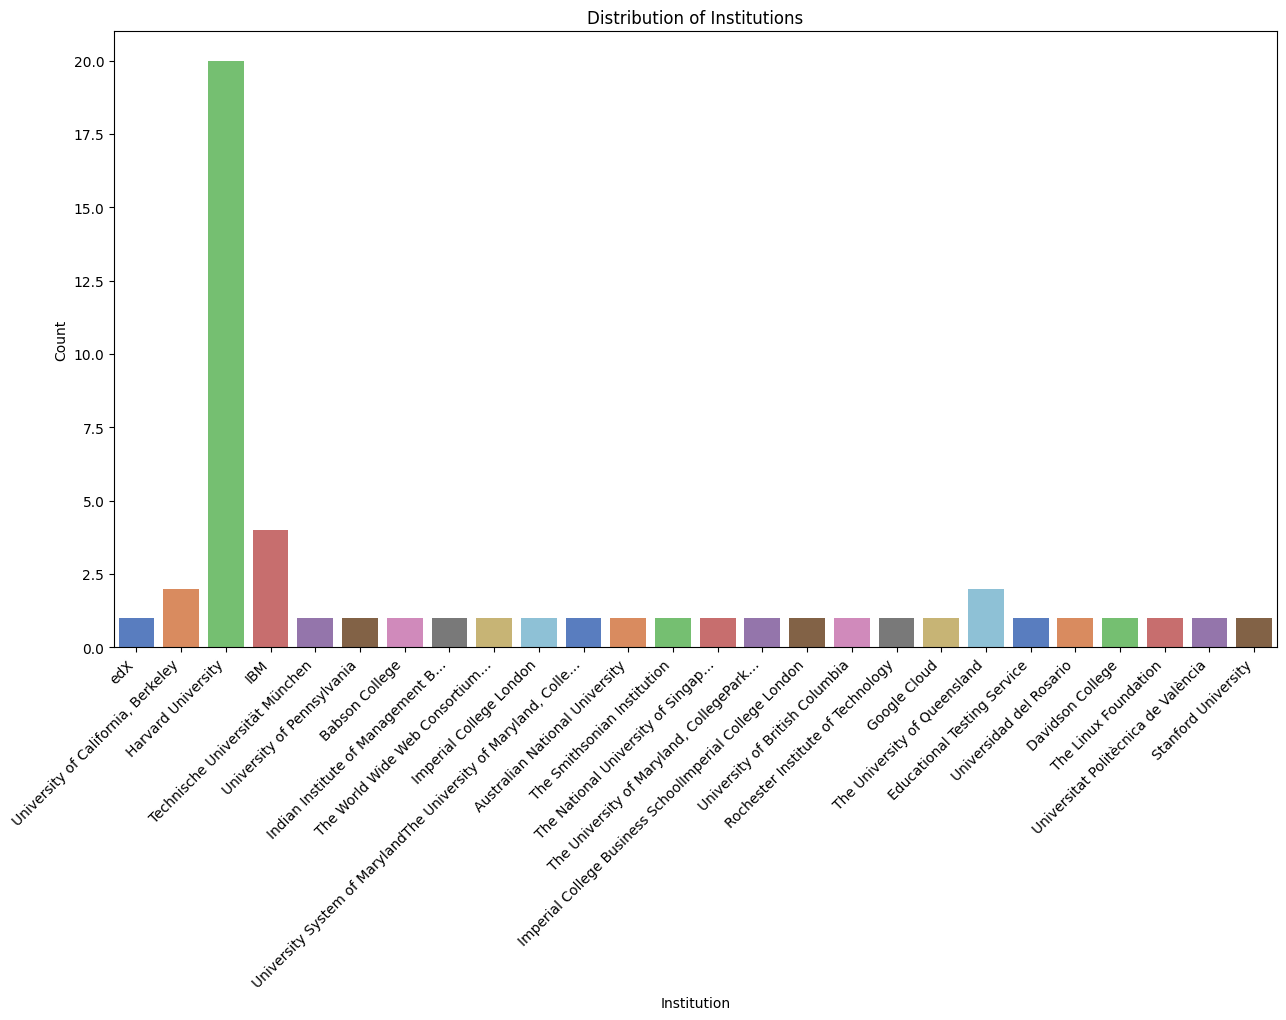

In [31]:
# EDA on Institution
plt.figure(figsize=(15, 8))
sns.countplot(x='institution', data=edx.head(50), palette='muted')
plt.title('Distribution of Institutions')
plt.xlabel('Institution')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

/tmp/ipykernel_22568/2513752983.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subject', data=edx, palette='muted')


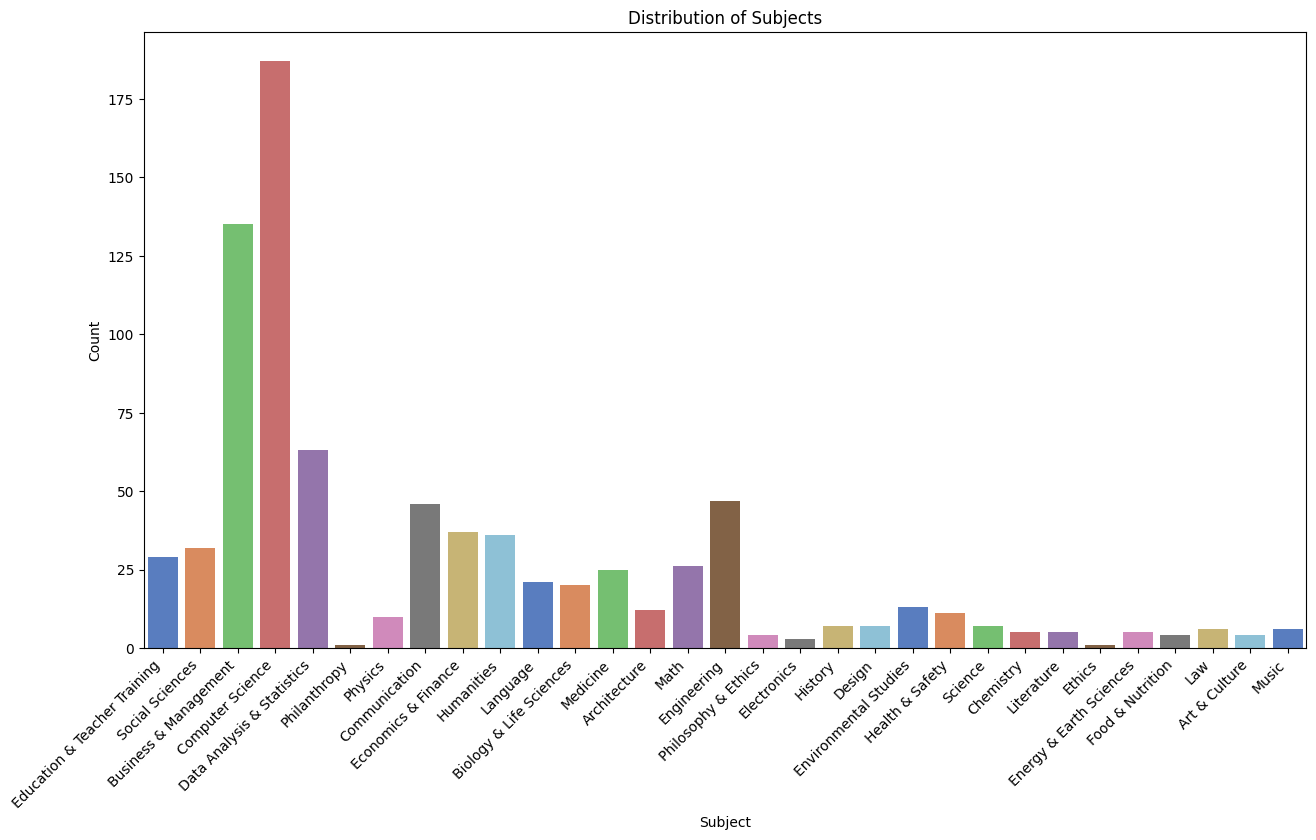

In [32]:
# EDA on Subject
plt.figure(figsize=(15, 8))
sns.countplot(x='subject', data=edx, palette='muted')
plt.title('Distribution of Subjects')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


/tmp/ipykernel_22568/1494305127.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='level', data=edx, palette='pastel')


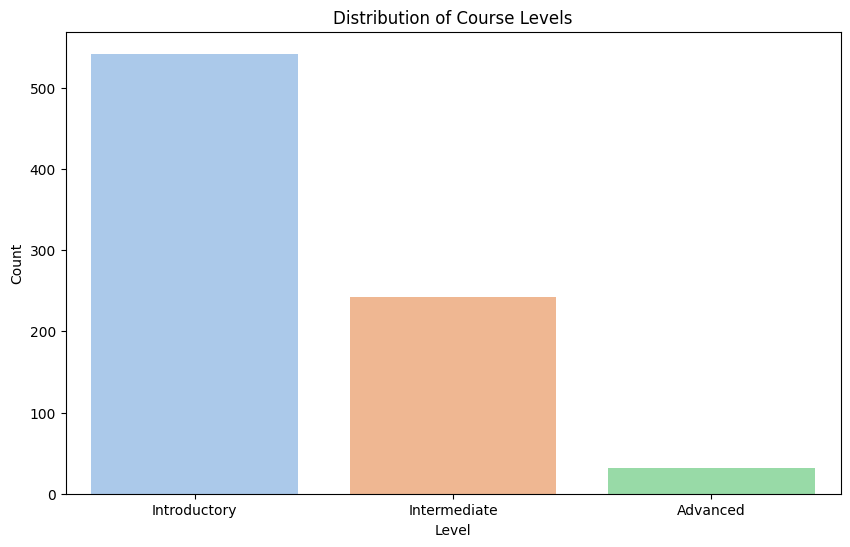

In [33]:
# EDA on Level
plt.figure(figsize=(10, 6))
sns.countplot(x='level', data=edx, palette='pastel')
plt.title('Distribution of Course Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()


/tmp/ipykernel_22568/2745097907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='language', data=edx, palette='dark')
/home/ninja/miniconda3/envs/kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ninja/miniconda3/envs/kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


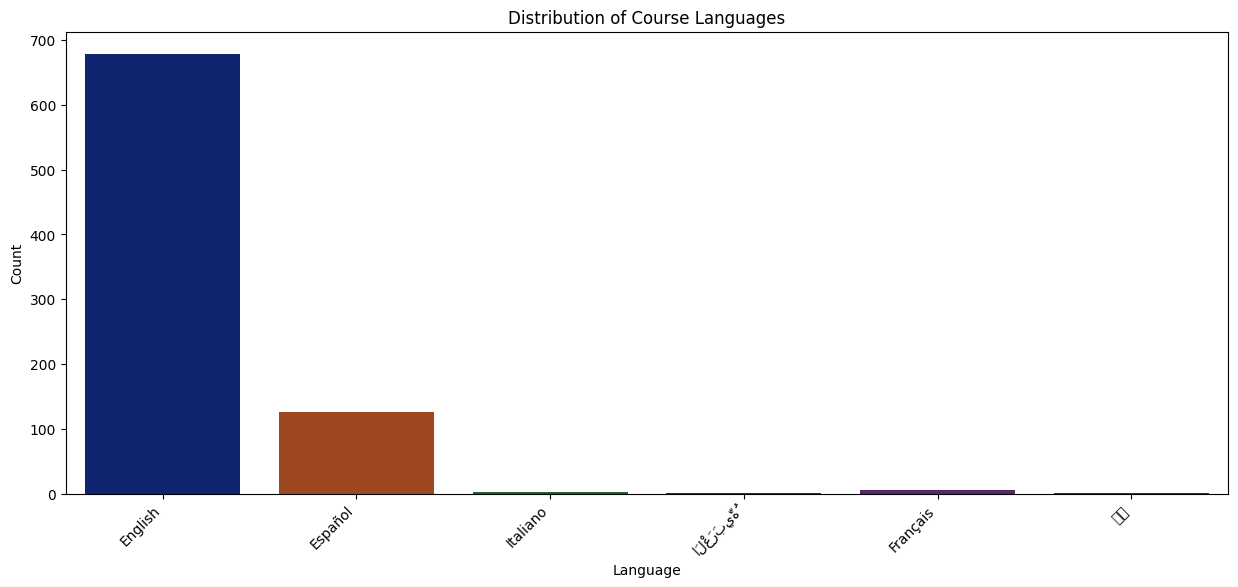

In [36]:
# EDA on Language
plt.figure(figsize=(15, 6))
sns.countplot(x='language', data=edx, palette='dark')
plt.title('Distribution of Course Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


/tmp/ipykernel_22568/1899294672.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='videotranscript', data=edx, palette='bright')
/home/ninja/miniconda3/envs/kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ninja/miniconda3/envs/kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


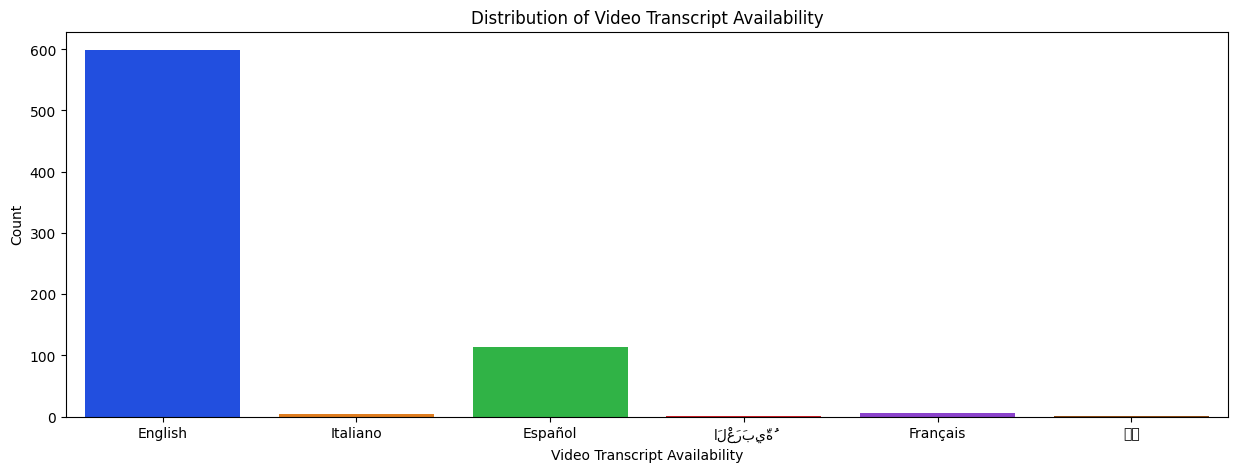

In [38]:
# EDA on Video Transcript
plt.figure(figsize=(15, 5))
sns.countplot(x='videotranscript', data=edx, palette='bright')
plt.title('Distribution of Video Transcript Availability')
plt.xlabel('Video Transcript Availability')
plt.ylabel('Count')
plt.show()


/tmp/ipykernel_22568/1481217269.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_skills[:50], palette='muted')


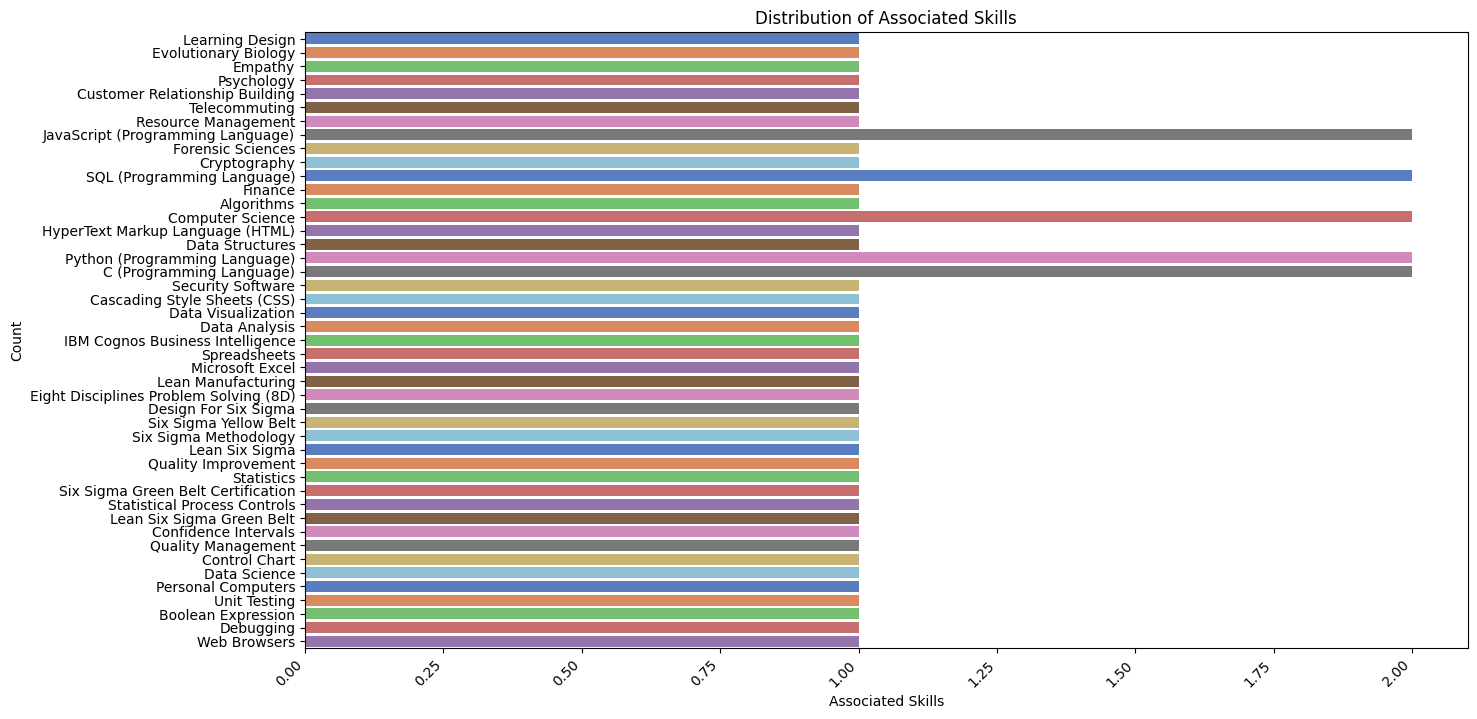

In [44]:
# Convert Associated Skills to a list
skills_list = [skills.split(', ') if pd.notnull(skills) else [] for skills in edx['associatedskills']]

# Flatten the list of skills
all_skills = [skill for skills_list in skills_list for skill in skills_list]

# Plot the Distribution of Associated Skills
plt.figure(figsize=(15, 8))
sns.countplot(y=all_skills[:50], palette='muted')
plt.title('Distribution of Associated Skills')
plt.xlabel('Associated Skills')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


# edX Dataset Analysis Report

### Overview

This analysis explores a dataset from edX, a prominent online learning platform. The dataset includes information about various courses offered on edX, covering aspects such as title, link, institution, subject, level, prerequisites, language, videotranscript, associated programs, and associated skills.

### Cleaning and Preprocessing

The dataset underwent meticulous cleaning and preprocessing to ensure data quality:

- **Handling Missing Values:** Null values were addressed appropriately.
- **Data Type Conversion:** Columns with duration or numerical information were converted to the appropriate data types.
- **Text Cleaning:** Text cleaning operations were performed on columns such as "prerequisites" and "videotranscript."

### Exploratory Data Analysis (EDA)

### Course Subjects

A bar plot was generated to visualize the distribution of courses across different subjects. Predominant subjects include Computer Science, Business & Management, Education & Teacher Training, and more.

### Language Distribution

An analysis of the distribution of courses based on the language they are offered in was conducted. The majority of courses are available in English, showcasing the platform's global accessibility.

### Distribution of Course Levels

The dataset encompasses courses at various levels, including Introductory, Intermediate, and Advanced. A count plot was created to visualize the distribution of course levels.

### Distribution of Associated Skills

The associated skills for each course were extracted and analyzed. A count plot illustrates the distribution of associated skills across all courses.

## Conclusion

This analysis provides insights into the diverse array of courses offered on edX, spanning different subjects, languages, and difficulty levels. The exploration of associated skills offers valuable information for learners seeking to acquire specific competencies.


# Online Learning Platforms Analysis Summary Report

## Coursera Dataset

### Overview

The Coursera dataset provides insights into courses offered on the platform, covering aspects such as title, partner, rating, skills, and more.

### Key Findings

1. **Average Rating by Partner:**
   - A bar plot was created to visualize the average rating of courses by different partners. Partners with higher average ratings indicate a positive correlation with course quality.

2. **Skills Analysis:**
   - The skills column was processed to extract and analyze the skills associated with each course. This provides valuable information about the skills covered across Coursera courses.

3. **Certificate Types:**
   - A section on certificate types highlights that most courses offer "Specialization Certificates," indicating a focus on providing valuable, career-oriented certifications.

## Udemy Dataset

### Overview

The Udemy dataset provides information on courses, including title, description, instructor, rating, review count, duration, lectures, and level.

### Key Findings

1. **Course Distribution:**
   - A bar plot illustrates the distribution of courses based on the number of lectures. The platform hosts a variety of courses with varying lecture counts.

2. **Duration Analysis:**
   - An EDA on course durations helps understand the distribution of course lengths. The analysis provides insights into the diverse durations of Udemy courses.

3. **Top Instructors and Ratings:**
   - An exploration of top instructors and their corresponding ratings provides information on the popularity and quality of courses on Udemy.

## Skillshare Dataset

### Overview

The Skillshare dataset includes information on courses such as title, link, duration, instructor, and students.

### Key Findings

1. **Duration Distribution:**
   - An analysis of the distribution of course durations was conducted. The duration column provides insights into the typical length of Skillshare courses.

2. **Top Courses by Student Enrollment:**
   - A bar plot visualizes the number of students enrolled in the top 20 courses. This information is valuable for understanding the popularity of specific courses.

## edX Dataset

### Overview

The edX dataset provides details on courses, including title, link, institution, subject, level, prerequisites, language, videotranscript, associated programs, and associated skills.

### Key Findings

1. **Course Subjects:**
   - A bar plot showcases the distribution of courses across different subjects on the edX platform. Notable subjects include Computer Science, Business & Management, and Education & Teacher Training.

2. **Language Distribution:**
   - An analysis of the distribution of courses based on language reveals that the majority are available in English, reflecting the global accessibility of the platform.

3. **Distribution of Course Levels:**
   - A count plot illustrates the distribution of courses based on different levels, providing insights into the variety of course difficulties.

4. **Distribution of Associated Skills:**
   - The associated skills for each course were extracted and visualized using a count plot, offering insights into the diverse skills covered.

## Conclusion

The combined analysis of Coursera, Udemy, Skillshare, and edX datasets provides a comprehensive overview of the online learning landscape. The insights gained from each platform's unique features contribute to a holistic understanding of the courses, instructors, and skills offered by these popular online learning platforms.


# Note For You

### This notebook is intended to demonstrate how to proceed with the data. No advanced EDA or data cleaning methods are used.